In [ ]:

!mkdir '/tmp/weather'
!wget --no-check-certificate \
      https://md-datasets-cache-zipfiles-prod.s3.eu-west-1.amazonaws.com/4drtyfjtfy-1.zip -O /tmp/weather/weather.zip

import os
import zipfile

local_zip = '/tmp/weather/weather.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/weather')
zip_ref.close()


local_zip = '/tmp/weather/dataset2.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/weather')
zip_ref.close()

base_dir = '/tmp/weather/dataset2'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

!apt-get -qq install -y graphviz && pip install split_folders

import os.path, shutil
import re


#making a folder for each category
r = re.compile("([a-zA-Z]+)")
folder_path = "/tmp/weather/dataset2"

images = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]

for image in images:
    folder_name = r.match(image)
    folder_name=folder_name.group(1)
    new_path = os.path.join(folder_path, folder_name)
    if not os.path.exists(new_path):
        os.makedirs(new_path)

    old_image_path = os.path.join(folder_path, image)
    new_image_path = os.path.join(new_path, image)
    shutil.move(old_image_path, new_image_path)
    

import splitfolders
folder_path = "/tmp/weather/dataset2"
#split the tada to 20 % test and 80% tarin and put the data in folder
splitfolders.ratio(folder_path,output=folder_path+"/split_data", seed=1337, ratio=(.8, 0.2))

train_dir='/tmp/weather/dataset2/split_data/train'
validation_dir='/tmp/weather/dataset2/split_data/val'


--2021-06-10 17:32:08--  https://md-datasets-cache-zipfiles-prod.s3.eu-west-1.amazonaws.com/4drtyfjtfy-1.zip
Resolving md-datasets-cache-zipfiles-prod.s3.eu-west-1.amazonaws.com (md-datasets-cache-zipfiles-prod.s3.eu-west-1.amazonaws.com)... 52.218.105.139
Connecting to md-datasets-cache-zipfiles-prod.s3.eu-west-1.amazonaws.com (md-datasets-cache-zipfiles-prod.s3.eu-west-1.amazonaws.com)|52.218.105.139|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 95592747 (91M) [application/octet-stream]
Saving to: ‘/tmp/weather/weather.zip’

/tmp/weather/weathe 100%[===================>]  91.16M  19.2MB/s    in 5.7s    

2021-06-10 17:32:14 (16.0 MB/s) - ‘/tmp/weather/weather.zip’ saved [95592747/95592747]



Copying files: 1125 files [00:00, 4184.20 files/s]


In [ ]:
#function for print the model's accuracy of both training and testing and their loss

def printfun(history):
  # Retrieve a list of accuracy results on training and validation data
  # sets for each training epoch
  acc = history.history['acc']
  val_acc = history.history['val_acc']

# Retrieve a list of list results on training and validation data
# sets for each training epoch
  loss = history.history['loss']
  val_loss = history.history['val_loss']

# Get number of epochs
  epochs = range(len(acc))

# Plot training and validation accuracy per epoch
  plt.plot(epochs, acc)
  plt.plot(epochs, val_acc)
  plt.title('Training and validation accuracy')

  plt.figure()

# Plot training and validation loss per epoch
  plt.plot(epochs, loss)
  plt.plot(epochs, val_loss)
  plt.title('Training and validation loss')

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow import keras
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow import keras
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dropout 

In [ ]:
img_input = layers.Input(shape=(150, 150,3))

model66 = keras.Sequential(
    [
        layers.Input(shape=(150, 150, 3)),
        layers.Conv2D(16, 3, activation='relu'),
        layers.MaxPooling2D(2),
        layers.Conv2D(64, 3, activation='relu'),
        layers.MaxPooling2D(2),
        layers.MaxPooling2D(2),
        layers.Flatten(),
        layers.Dense(512, activation='relu'),
        layers.Dense(1, activation='sigmoid'),
    ]
)
model66.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        9280      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 18, 18, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 20736)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 512)              

In [ ]:
#model 1 with dropout and no data auggmentation, batch size of 32

img_input = layers.Input(shape=(150, 150, 3))
model = keras.Sequential(
    [
        layers.Input(shape=(150, 150, 3)),
        layers.Conv2D(16, 3, activation='relu'),
        layers.MaxPooling2D(2),
        layers.Conv2D(32, 3, activation='relu'),
        layers.MaxPooling2D(2),
        # Third convolution extracts 64 filters that are 3x3
        # Convolution is followed by max-pooling layer with a 2x2 window
        layers.Conv2D(64, 3, activation='relu'),
        layers.MaxPooling2D(2),
        # Flatten feature map to a 1-dim tensor so we can add fully connected layers
        layers.Flatten(),
        layers.Dropout(0.5), #with dropout!
        layers.Dense(512, activation='relu'),
        layers.Dense(4, activation='softmax'),#there are 4 categories so in the last layer we have 4 vertexes and we use softmax.
    ]
)

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 17, 17, 64)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 18496)            

In [ ]:


model.compile(loss='categorical_crossentropy',optimizer=RMSprop(lr=0.001),metrics=['acc'])

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=16,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='categorical')

# Flow validation images in batches of 20 using val_datagen generator
validation_generator = val_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='categorical')

history1 = model.fit_generator(
      train_generator,
      epochs=9,
      steps_per_epoch=28,#images = batch_size * steps
      validation_data=validation_generator,
      validation_steps=7,
      verbose=1)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Found 899 images belonging to 4 classes.
Found 226 images belonging to 4 classes.


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/9
28/28 [==============================] - 6s 168ms/step - loss: 0.3212 - acc: 0.9487 - val_loss: 0.5248 - val_acc: 0.9062
Epoch 2/9
28/28 [==============================] - 4s 146ms/step - loss: 0.0939 - acc: 0.9821 - val_loss: 0.3881 - val_acc: 0.9420
Epoch 3/9
28/28 [==============================] - 4s 145ms/step - loss: 0.1240 - acc: 0.9576 - val_loss: 0.4417 - val_acc: 0.9241
Epoch 4/9
28/28 [==============================] - 4s 154ms/step - loss: 0.0660 - acc: 0.9839 - val_loss: 0.5306 - val_acc: 0.9330
Epoch 5/9
28/28 [==============================] - 4s 142ms/step - loss: 0.0875 - acc: 0.9777 - val_loss: 0.4908 - val_acc: 0.9107
Epoch 6/9
28/28 [==============================] - 4s 148ms/step - loss: 0.0670 - acc: 0.9799 - val_loss: 0.5880 - val_acc: 0.9152
Epoch 7/9
28/28 [==============================] - 4s 143ms/step - loss: 0.1127 - acc: 0.9799 - val_loss: 0.4880 - val_acc: 0.9152
Epoch 8/9
28/28 [==============================] - 4s 148ms/step - loss: 0.0741 - a

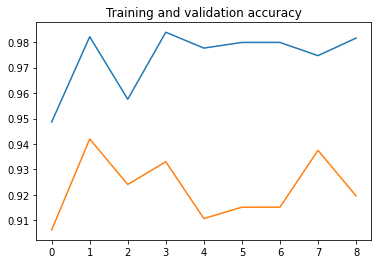

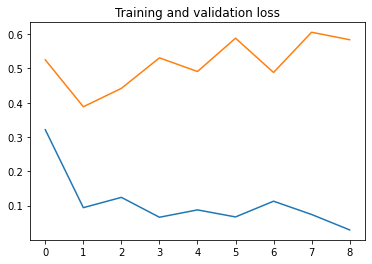

In [ ]:
printfun(history1)

In [ ]:
#model 2 with dropout and data auggmentation, batch size 16
img_input = layers.Input(shape=(150, 150, 3))

model1 = keras.Sequential(
    [
        layers.Input(shape=(150, 150, 3)),
        layers.Conv2D(16, 3, activation='relu'),
        layers.MaxPooling2D(2),
        layers.Conv2D(32, 3, activation='relu'),
        layers.MaxPooling2D(2),
        # Third convolution extracts 64 filters that are 3x3
        # Convolution is followed by max-pooling layer with a 2x2 window
        layers.Conv2D(64, 3, activation='relu'),
        layers.MaxPooling2D(2),
        # Flatten feature map to a 1-dim tensor so we can add fully connected layers
        layers.Flatten(),
        layers.Dropout(0.5), #only change!
        layers.Dense(512, activation='relu'),
       layers.Dense(4, activation='softmax'), #there are 4 categories so in the last layer we have 4 vertexes and we use softmax.
    ]
)

model1.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 17, 17, 64)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 18496)            

In [ ]:

model1.compile(loss='categorical_crossentropy',optimizer=RMSprop(lr=0.001),metrics=['acc'])
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

val_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=16,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='categorical')

# Flow validation images in batches of 20 using val_datagen generator
validation_generator = val_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=16,
        class_mode='categorical')

history2 = model1.fit_generator(
      train_generator,
      epochs=9,
      steps_per_epoch=54,#images = batch_size * steps
      validation_data=validation_generator,
      validation_steps=15,
      verbose=1)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Found 899 images belonging to 4 classes.
Found 226 images belonging to 4 classes.


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/9
54/54 [==============================] - 11s 188ms/step - loss: 0.4172 - acc: 0.8684 - val_loss: 0.2436 - val_acc: 0.9115
Epoch 2/9
54/54 [==============================] - 10s 184ms/step - loss: 0.3398 - acc: 0.8778 - val_loss: 0.6363 - val_acc: 0.8142
Epoch 3/9
54/54 [==============================] - 10s 184ms/step - loss: 0.3096 - acc: 0.8813 - val_loss: 0.2789 - val_acc: 0.9071
Epoch 4/9
54/54 [==============================] - 10s 184ms/step - loss: 0.3007 - acc: 0.8907 - val_loss: 0.3911 - val_acc: 0.8761
Epoch 5/9
54/54 [==============================] - 10s 179ms/step - loss: 0.3310 - acc: 0.8778 - val_loss: 0.2484 - val_acc: 0.9115
Epoch 6/9
54/54 [==============================] - 10s 187ms/step - loss: 0.2886 - acc: 0.9048 - val_loss: 0.2007 - val_acc: 0.9115
Epoch 7/9
54/54 [==============================] - 10s 184ms/step - loss: 0.2904 - acc: 0.8954 - val_loss: 0.3864 - val_acc: 0.8717
Epoch 8/9
54/54 [==============================] - 10s 183ms/step - loss: 0.

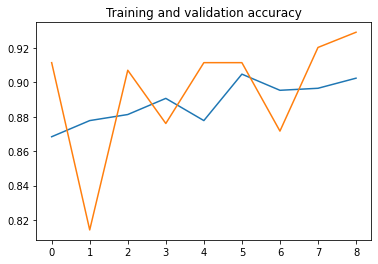

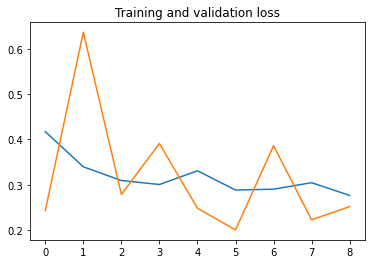

In [ ]:
printfun(history2)

In [ ]:
# VGG16 model with data augmentation and with normalization, and batch size 32
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dropout 


#have the mean pixel values from each channel (red, green, and blue) as calculated on the ImageNet training dataset subtracted from the input.
#setting the “featurewise_center” argument to “True” and manually specifying the mean pixel values to use when centering as the mean values from the ImageNet training dataset: [123.68, 116.779, 103.939].
train_datagen = ImageDataGenerator(
    featurewise_center=True,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)


train_generator = train_datagen.flow_from_directory(
        train_dir,  
        target_size=(224, 224),  
        batch_size=32,
        class_mode='categorical')
    

val_datagen = ImageDataGenerator(featurewise_center=True)

validation_generator = val_datagen.flow_from_directory(
    validation_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical')

model2 = VGG16(include_top=False, input_shape=(224, 224, 3))
	# mark loaded layers as not trainable
for layer in model2.layers:
	layer.trainable = False
	# add new classifier layers
flat1 = Flatten()(model2.layers[-1].output)
flat1=Dropout(0.5)(flat1)
class1 = Dense(128, activation='relu', kernel_initializer='he_uniform')(flat1)
output = Dense(4, activation='softmax')(class1) #there are 4 categories so in the last layer we have 4 vertexes and we use softmax.
# define new model
model2 = Model(inputs=model2.inputs, outputs=output)
# compile model
opt = SGD(lr=0.001, momentum=0.9)


model2.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
 
history3 = model2.fit(
      train_generator,
      steps_per_epoch=28,
      epochs=15,
      validation_data=validation_generator,
      validation_steps=7,
      verbose=1)

Found 899 images belonging to 4 classes.
Found 226 images belonging to 4 classes.


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")
/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/15
28/28 [==============================] - 17s 563ms/step - loss: 8.1172 - accuracy: 0.5970 - val_loss: 1.3464 - val_accuracy: 0.8304
Epoch 2/15
28/28 [==============================] - 15s 533ms/step - loss: 1.5725 - accuracy: 0.8284 - val_loss: 0.2720 - val_accuracy: 0.9152
Epoch 3/15
28/28 [==============================] - 15s 547ms/step - loss: 0.6739 - accuracy: 0.8143 - val_loss: 0.3051 - val_accuracy: 0.9196
Epoch 4/15
28/28 [==============================] - 15s 537ms/step - loss: 0.4616 - accuracy: 0.8488 - val_loss: 0.2715 - val_accuracy: 0.9330
Epoch 5/15
28/28 [==============================] - 15s 527ms/step - loss: 0.5663 - accuracy: 0.8460 - val_loss: 0.5642 - val_accuracy: 0.8929
Epoch 6/15
28/28 [==============================] - 15s 544ms/step - loss: 0.4632 - accuracy: 0.8635 - val_loss: 0.2317 - val_accuracy: 0.9196
Epoch 7/15
28/28 [==============================] - 15s 533ms/step - loss: 0.3772 - accuracy: 0.8801 - val_loss: 0.2292 - val_accuracy: 0.9464

Text(0.5, 1.0, 'Training and validation loss')

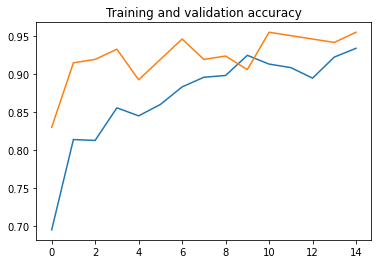

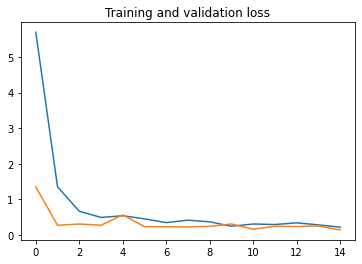

In [ ]:
# Retrieve a list of accuracy results on training and validation data
  # sets for each training epoch
acc = history3.history['accuracy']
val_acc = history3.history['val_accuracy']

# Retrieve a list of list results on training and validation data
# sets for each training epoch
loss = history3.history['loss']
val_loss = history3.history['val_loss']

# Get number of epochs
epochs = range(len(acc))

# Plot training and validation accuracy per epoch
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Training and validation accuracy')

plt.figure()

# Plot training and validation loss per epoch
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Training and validation loss')